In [2]:
%cd 

/Users/palessandro


In [3]:
%cd Documents/GitHub/scRNAseq-AAE/src

/Users/palessandro/Documents/GitHub/scRNAseq-AAE/src


In [4]:
from keras.utils.vis_utils import model_to_dot

import tensorflow as tf
from tensorflow.keras.utils import plot_model

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import os, sys

from imp import load_source
from models import *
from utils import *

try:
    tf.enable_eager_execution()
except:
    pass

tf.executing_eagerly()
tf.random.set_seed(32)

In [4]:
import tensorflow as tf
from tensorflow.keras import layers as L
from tensorflow.keras import Model
from tensorflow.keras.losses import mse
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping
from tensorflow.keras import regularizers

In [5]:
parameters = {
    'latent_dim': 10,
    'layers_enc_dim': [200, 100],
    'layers_dec_dim': [100, 200],
    'layers_dis_dim': [200, 100, 50, 40, 30],
    'batch_size': 1000,
    'epochs': 30
}

In [6]:
model = VAE(**parameters)

In [7]:
model.get_parameters()

,Value,Description
batch_size,1000,batch size
epochs,30,number of epochs
alpha,0.1,alpha coeff. in activation function
do_rate,0.1,dropout rate
kernel_initializer,glorot_uniform,kernel initializer of all dense layers
bias_initializer,zeros,bias initializer of all dense layers
l2_weight,None,weight of l2 kernel regularization
l1_weight,None,weight of l1 activity regularization
latent_dim,10,dimension of latent space Z
layer_1_enc_dim,200,dimension of encoder dense layer 1


In [8]:
model.load_data('../data/proc/pbmc3k.h5ad')

Dataset imported.


In [9]:
model.labels

[0,
 2,
 0,
 5,
 4,
 0,
 0,
 3,
 3,
 5,
 2,
 0,
 0,
 1,
 3,
 0,
 1,
 0,
 2,
 2,
 2,
 0,
 1,
 2,
 0,
 0,
 5,
 0,
 0,
 5,
 3,
 2,
 1,
 3,
 1,
 0,
 1,
 5,
 0,
 4,
 3,
 3,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 5,
 1,
 5,
 5,
 0,
 0,
 2,
 1,
 0,
 1,
 5,
 0,
 0,
 4,
 5,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 4,
 0,
 4,
 0,
 2,
 0,
 0,
 0,
 1,
 1,
 3,
 1,
 0,
 1,
 2,
 0,
 0,
 2,
 2,
 0,
 1,
 2,
 2,
 1,
 1,
 0,
 1,
 1,
 6,
 4,
 1,
 0,
 3,
 4,
 2,
 3,
 2,
 0,
 6,
 1,
 0,
 0,
 0,
 1,
 5,
 0,
 2,
 5,
 0,
 3,
 1,
 2,
 3,
 0,
 0,
 1,
 2,
 4,
 0,
 0,
 0,
 0,
 3,
 2,
 1,
 0,
 0,
 0,
 2,
 0,
 3,
 4,
 2,
 3,
 3,
 2,
 0,
 1,
 4,
 3,
 0,
 0,
 0,
 1,
 0,
 0,
 4,
 3,
 1,
 2,
 6,
 2,
 1,
 3,
 2,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 1,
 0,
 6,
 0,
 0,
 2,
 2,
 5,
 2,
 0,
 5,
 1,
 4,
 4,
 0,
 1,
 0,
 2,
 0,
 2,
 3,
 4,
 3,
 3,
 4,
 3,
 3,
 1,
 3,
 3,
 0,
 0,
 1,
 5,
 0,
 3,
 4,
 0,
 3,
 3,
 3,
 0,
 1,
 1,
 0,
 2,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 2,
 5,
 0,
 1,
 0,
 0,
 0,
 3,
 5,
 0,
 2,
 1,
 0,
 7,
 1,
 0,
 1,
 0,
 2,


In [10]:
model.rescale_data()

Dataset rescaled.


In [11]:
model.data

array([[-1.7150213e-01, -2.8281140e-01, -4.9584758e-02, ...,
        -1.0294342e-01, -2.0921938e-01, -5.3130406e-01],
       [-2.1462303e-01, -3.7560135e-01, -6.4472154e-02, ...,
        -2.9296505e-01, -3.1336972e-01, -5.9676743e-01],
       [-3.7695917e-01, -2.9723111e-01, -6.9460005e-02, ...,
        -1.7101307e-01, -1.7096411e-01,  1.3792611e+00],
       ...,
       [-2.0712890e-01, -2.5214970e-01, -4.9072269e-02, ...,
        -4.9823590e-02, -1.6114253e-01,  2.0418839e+00],
       [-1.9036458e-01, -2.2776997e-01, -4.4680536e-02, ...,
         1.1567287e-03, -1.3526656e-01, -4.8220244e-01],
       [-3.3385262e-01, -2.5530553e-01, -6.0646087e-02, ...,
        -8.0574334e-02, -1.3037601e-01, -4.7142717e-01]], dtype=float32)

In [12]:
model.layers_enc_dim

[200, 100]

In [13]:
for x,y in enumerate(model.layers_enc_dim):
    print(x+1)
    print(y)

1
200
2
100


In [171]:
encoder=model._build_encoder()

In [172]:
z_mean=encoder.get_layer('z_mean')

In [173]:
model.latent_dim

10

In [174]:
type(z_mean)

tensorflow.python.keras.layers.core.Dense

In [47]:
encoder_input = L.Input(shape=(model.original_dim,), name="X")

x = encoder_input

# add dense layers
for i, nodes in enumerate(model.layers_enc_dim):
    x = L.Dense(nodes,
                name="H_" + str(i + 1),
                kernel_initializer=model.kernel_initializer
                )(x)

    x = L.BatchNormalization(name='BN_' + str(i + 1))(x)

    x = L.LeakyReLU(alpha=model.alpha, name='LR_' + str(i + 1))(x)

    x = L.Dropout(rate=model.do_rate, name='D_' + str(i + 1))(x)

z_mean = L.Dense(model.latent_dim,
                 name='z_mean',
                 kernel_initializer=model.kernel_initializer,
                 bias_initializer=model.bias_initializer)(x)

z_log_var = L.Dense(model.latent_dim,
                    name='z_log_var',
                    kernel_initializer=model.kernel_initializer,
                    bias_initializer=model.bias_initializer)(x)

In [22]:
tf.random.set_seed(42)
z_mean = tf.convert_to_tensor(np.array([[1,2],[3,4]]).astype('float32'))
z_log_var = tf.convert_to_tensor(np.array([[5,6],[7,8]]).astype('float32'))
batch = K.shape(z_mean)[0]
dim = K.int_shape(z_mean)[1]
# by default, random_normal has mean = 0 and std = 1.0
epsilon = K.random_normal(shape=(batch, dim),seed=42)
z_mean + K.exp(0.5 * z_log_var) * epsilon

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 17.018486 ,  -1.0975046],
       [ 33.18102  , -39.631786 ]], dtype=float32)>

In [23]:
tf.random.set_seed(42)
z_mean = tf.convert_to_tensor(np.array([[1,2],[3,4]]).astype('float32'))
z_log_var = tf.convert_to_tensor(np.array([[5,6],[7,8]]).astype('float32'))
batch = K.int_shape(z_mean)[0]
dim = K.int_shape(z_mean)[1]
# by default, random_normal has mean = 0 and std = 1.0
epsilon = K.random_normal(shape=(batch, dim),seed=42)
z_mean + K.exp(0.5 * z_log_var) * epsilon

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 17.018486 ,  -1.0975046],
       [ 33.18102  , -39.631786 ]], dtype=float32)>

In [1]:
from keras.utils.vis_utils import model_to_dot

import tensorflow as tf
from tensorflow.keras.utils import plot_model

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import os, sys

sys.path.append('../src')

from imp import load_source
from models import *
from utils import *

try:
    tf.enable_eager_execution()
except:
    pass

tf.executing_eagerly()
tf.random.set_seed(32)

In [2]:
parameters = {
    'latent_dim': 10,
    'layers_enc_dim': [200, 100],
    'layers_dec_dim': [100, 200],
    'layers_dis_dim': [200, 100, 50, 40, 30],
    'batch_size': 1000,
    'epochs': 30
}

In [3]:
model = AAE1(**parameters)

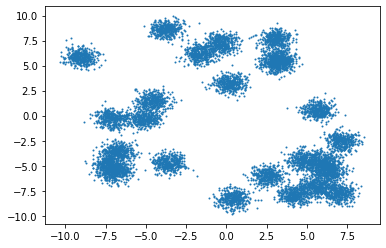

In [4]:
# Create dataset

from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

NUM_CLUSTERS = 25

features, target = make_blobs(n_samples = 10000,
                              n_features = 2000,
                              centers = NUM_CLUSTERS,
                              cluster_std = 0.5,
                              shuffle = True,
                              random_state = 32)

model.data = features
model.original_dim = model.data.shape[1]
model.labels = target
model.gene_list = target

plt.scatter(features[:,0], features[:,1], s=1)
plt.show()

In [5]:
# Rescale gene expression data

model.rescale_data()

Dataset rescaled.


In [6]:
# Show network hyper-parameters

print("List of Network parameters")
model.get_parameters()

List of Network parameters


,Value,Description
batch_size,1000,batch size
epochs,30,number of epochs
alpha,0.1,alpha coeff. in activation function
do_rate,0.1,dropout rate
kernel_initializer,glorot_uniform,kernel initializer of all dense layers
bias_initializer,zeros,bias initializer of all dense layers
l2_weight,None,weight of l2 kernel regularization
l1_weight,None,weight of l1 activity regularization
latent_dim,10,dimension of latent space Z
layer_1_enc_dim,200,dimension of encoder dense layer 1


In [7]:
# Define distribute strategy and build the full model

TF_DISTRIBUTE_MIRRORED_STRATEGY = True
TF_DISTRIBUTE_CENTRAL_STORAGE_STRATEGY = False

if TF_DISTRIBUTE_MIRRORED_STRATEGY:

    #     CROSS_DEVICE_OPS = tf.distribute.HierarchicalCopyAllReduce()
    #     CROSS_DEVICE_OPS = tf.distribute.ReductionToOneDevice()
    CROSS_DEVICE_OPS = tf.distribute.NcclAllReduce()

    strategy = tf.distribute.MirroredStrategy(
        cross_device_ops=CROSS_DEVICE_OPS)

    with strategy.scope():
        model.build_model()

elif TF_DISTRIBUTE_CENTRAL_STORAGE_STRATEGY:
    
    strategy = tf.distribute.experimental.CentralStorageStrategy()
    
    with strategy.scope():
        
        BATCH_SIZE_PER_REPLICA = model.batch_size
        global_batch_size = (BATCH_SIZE_PER_REPLICA * strategy.num_replicas_in_sync)
        model.batch_size = global_batch_size
        model.build_model()

else:
     model.build_model()

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


In [8]:
# Export model graphs

log_dir = '../results/AAE1/GAUSSIAN-CLUSTERING/' + str(NUM_CLUSTERS)
os.makedirs(log_dir + '/graphs', exist_ok=True)
model.export_graph(log_dir + '/graphs')

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')
('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')
('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')
('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')
Model graphs saved.

